In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('netflix1.csv')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


## Data Exploration

In [3]:
df.sample(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
587,s425,Movie,Chhota Bheem: The Rise of Kirmada,Rajiv Chilaka,India,7/22/2021,2012,TV-Y7,68 min,Children & Family Movies
6159,s8349,Movie,The House on Coco Road,Damani Baker,United States,6/30/2017,2016,TV-14,79 min,Documentaries
1722,s2046,Movie,I'm Thinking of Ending Things,Charlie Kaufman,United States,9/4/2020,2020,R,135 min,"Dramas, Independent Movies"
4931,s6802,Movie,French Dirty,"Wade Allain-Marcus, Jesse Allain-Marcus",United States,2/4/2016,2015,TV-MA,72 min,"Dramas, Independent Movies"
3565,s4930,Movie,I Am not an Easy Man,Eleonore Pourriat,France,4/13/2018,2018,TV-MA,99 min,"Comedies, International Movies, Romantic Movies"


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8790,8790,s8786,1
type,8790,2,Movie,6126
title,8790,8787,9-Feb,2
director,8790,4528,Not Given,2588
country,8790,86,United States,3240
date_added,8790,1713,1/1/2020,110
rating,8790,14,TV-MA,3205
duration,8790,220,1 Season,1791
listed_in,8790,513,"Dramas, International Movies",362


In [8]:
df[df.duplicated()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


## Data Cleaning 

In [9]:
df.sample(20)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
6762,s836,TV Show,Eden,Not Given,Pakistan,5/27/2021,2021,TV-PG,1 Season,"Anime Series, International TV Shows"
3339,s4591,Movie,My Little Pony Equestria Girls: Rollercoaster ...,Ishi Rudell,United States,10/1/2018,2018,TV-Y,44 min,Children & Family Movies
7765,s4033,TV Show,Immortals,Not Given,Turkey,3/8/2019,2018,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror"
4623,s6403,Movie,Cake,Asim Abbasi,United Kingdom,5/15/2019,2018,TV-MA,125 min,"Comedies, Dramas, International Movies"
1564,s1816,Movie,The Magic School Bus Rides Again The Frizz Con...,Richard Weston,Canada,10/20/2020,2020,TV-Y,46 min,Children & Family Movies
2533,s3265,Movie,Earthquake Bird,Wash Westmoreland,United Kingdom,11/15/2019,2019,R,107 min,"Dramas, Romantic Movies"
6379,s8612,Movie,Traffic Signal,Madhur Bhandarkar,India,12/31/2019,2007,TV-MA,130 min,"Dramas, Independent Movies, International Movies"
2339,s2952,Movie,"Faith, Hope & Love",Robert Krantz,United States,2/4/2020,2019,PG,106 min,"Comedies, Faith & Spirituality, Romantic Movies"
8161,s5408,TV Show,World at Your Feet,Not Given,Singapore,7/1/2017,2014,TV-14,1 Season,"International TV Shows, TV Dramas"
7097,s2043,TV Show,Cleverman,Not Given,Australia,9/5/2020,2017,TV-MA,1 Season,"TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers"


### Check the nested columns and Separete them

In [10]:
nested_cols = ['director', 'listed_in']
for column in nested_cols:
    df[column] = df[column].str.split(', ')
    df = df.explode(column)

In [11]:
df.shape

(20901, 10)

In [12]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [13]:
df.isnull().sum()   

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['added_year'] = df['date_added'].dt.year # seperate the year from the date_added

In [15]:
df.sample()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,added_year
3333,s4585,Movie,Manje Bistre,Baljit Singh Deo,India,2018-10-01,2017,TV-14,136 min,Comedies,2018


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20901 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       20901 non-null  object        
 1   type          20901 non-null  object        
 2   title         20901 non-null  object        
 3   director      20901 non-null  object        
 4   country       20901 non-null  object        
 5   date_added    20901 non-null  datetime64[ns]
 6   release_year  20901 non-null  int64         
 7   rating        20901 non-null  object        
 8   duration      20901 non-null  object        
 9   listed_in     20901 non-null  object        
 10  added_year    20901 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 1.8+ MB


### Sperate this data into movies and tv shows 

In [17]:
df.type.value_counts()

type
Movie      14621
TV Show     6280
Name: count, dtype: int64

In [18]:
movies_data = df[df['type'] == 'Movie']
movies_data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Comedies,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Dramas,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Independent Movies,2021
...,...,...,...,...,...,...,...,...,...,...,...
8716,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,Dramas,2019
8716,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,International Movies,2019
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,Dramas,2017
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,International Movies,2017


In [19]:
tvseries_data = df[df['type'] == 'TV Show']
tvseries_data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,added_year
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,International TV Shows,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,TV Action & Adventure,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,TV Dramas,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,TV Horror,2021
...,...,...,...,...,...,...,...,...,...,...,...
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,International TV Shows,2016
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,Romantic TV Shows,2016
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,TV Dramas,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018


#### Add the columns in movie_data is "runtime in mins" and tvseries_data is "seasons"


In [20]:
movies_data['runtime_in_mins'] = movies_data['duration'].str.split(' ').str[0]
tvseries_data['seasons'] = tvseries_data['duration'].str.split(' ').str[0]


In [21]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14621 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          14621 non-null  object        
 1   type             14621 non-null  object        
 2   title            14621 non-null  object        
 3   director         14621 non-null  object        
 4   country          14621 non-null  object        
 5   date_added       14621 non-null  datetime64[ns]
 6   release_year     14621 non-null  int64         
 7   rating           14621 non-null  object        
 8   duration         14621 non-null  object        
 9   listed_in        14621 non-null  object        
 10  added_year       14621 non-null  int32         
 11  runtime_in_mins  14621 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 1.4+ MB


In [22]:
#change datatype integer of runtime_in_mins column
movies_data.runtime_in_mins = movies_data.runtime_in_mins.astype(int)  

In [23]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14621 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          14621 non-null  object        
 1   type             14621 non-null  object        
 2   title            14621 non-null  object        
 3   director         14621 non-null  object        
 4   country          14621 non-null  object        
 5   date_added       14621 non-null  datetime64[ns]
 6   release_year     14621 non-null  int64         
 7   rating           14621 non-null  object        
 8   duration         14621 non-null  object        
 9   listed_in        14621 non-null  object        
 10  added_year       14621 non-null  int32         
 11  runtime_in_mins  14621 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 1.4+ MB


In [24]:
tvseries_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6280 entries, 1 to 8789
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6280 non-null   object        
 1   type          6280 non-null   object        
 2   title         6280 non-null   object        
 3   director      6280 non-null   object        
 4   country       6280 non-null   object        
 5   date_added    6280 non-null   datetime64[ns]
 6   release_year  6280 non-null   int64         
 7   rating        6280 non-null   object        
 8   duration      6280 non-null   object        
 9   listed_in     6280 non-null   object        
 10  added_year    6280 non-null   int32         
 11  seasons       6280 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 613.3+ KB


In [25]:
#change datatype integer of seasons
tvseries_data.seasons = tvseries_data.seasons.astype(int)

In [26]:
tvseries_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6280 entries, 1 to 8789
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6280 non-null   object        
 1   type          6280 non-null   object        
 2   title         6280 non-null   object        
 3   director      6280 non-null   object        
 4   country       6280 non-null   object        
 5   date_added    6280 non-null   datetime64[ns]
 6   release_year  6280 non-null   int64         
 7   rating        6280 non-null   object        
 8   duration      6280 non-null   object        
 9   listed_in     6280 non-null   object        
 10  added_year    6280 non-null   int32         
 11  seasons       6280 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 613.3+ KB


In [27]:
movies_data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,added_year,runtime_in_mins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,90
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,2021,91
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Comedies,2021,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Dramas,2021,125
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Independent Movies,2021,125
...,...,...,...,...,...,...,...,...,...,...,...,...
8716,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,Dramas,2019,136
8716,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,International Movies,2019,136
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,Dramas,2017,89
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,International Movies,2017,89


### Remove "duration" column from movies_data and tvseries_data


In [28]:
movies_data = movies_data.drop(columns=['duration']).reset_index(drop=True)
tvseries_data = tvseries_data.drop(columns=['duration']).reset_index(drop=True)

In [29]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14621 entries, 0 to 14620
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          14621 non-null  object        
 1   type             14621 non-null  object        
 2   title            14621 non-null  object        
 3   director         14621 non-null  object        
 4   country          14621 non-null  object        
 5   date_added       14621 non-null  datetime64[ns]
 6   release_year     14621 non-null  int64         
 7   rating           14621 non-null  object        
 8   listed_in        14621 non-null  object        
 9   added_year       14621 non-null  int32         
 10  runtime_in_mins  14621 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(7)
memory usage: 1.2+ MB


In [30]:
tvseries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6280 non-null   object        
 1   type          6280 non-null   object        
 2   title         6280 non-null   object        
 3   director      6280 non-null   object        
 4   country       6280 non-null   object        
 5   date_added    6280 non-null   datetime64[ns]
 6   release_year  6280 non-null   int64         
 7   rating        6280 non-null   object        
 8   listed_in     6280 non-null   object        
 9   added_year    6280 non-null   int32         
 10  seasons       6280 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(7)
memory usage: 515.3+ KB


In [31]:
print(f'Cleaned Netflix Data is {df.shape[0]} Rows and {df.shape[1]} Columns')
print(f'Movies Data is {movies_data.shape[0]} Rows and {movies_data.shape[1]} Columns')
print(f'TV Series Data is {tvseries_data.shape[0]} Rows and {tvseries_data.shape[1]} Columns')

Cleaned Netflix Data is 20901 Rows and 11 Columns
Movies Data is 14621 Rows and 11 Columns
TV Series Data is 6280 Rows and 11 Columns


In [32]:
movies_data

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,added_year,runtime_in_mins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,Documentaries,2021,90
1,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,Children & Family Movies,2021,91
2,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,Comedies,2021,91
3,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,Dramas,2021,125
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,Independent Movies,2021,125
...,...,...,...,...,...,...,...,...,...,...,...
14616,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,Dramas,2019,136
14617,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,International Movies,2019,136
14618,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,Dramas,2017,89
14619,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,International Movies,2017,89


### saving the files for further analysis:


In [33]:
# saving the files for further analysis:
df.to_csv('netflix_cleaned_data.csv',sep=',',index=False)
movies_data.to_csv('cleaned_movies_data.csv',sep=',',index=False)
tvseries_data.to_csv('cleaned_tvshows_data.csv',sep=',',index=False)

## Exploratory Data Analysis (EDA):


#### Upload cleaned data sets

In [34]:
nx = pd.read_csv('netflix_cleaned_data.csv')
md = pd.read_csv('cleaned_movies_data.csv')
tvsd = pd.read_csv('cleaned_tvshows_data.csv')

#### Netflix total content as per the type (Movie/TV Show)

In [35]:
p_type = nx.groupby('type')['show_id'].nunique().reset_index()
p_type

,type,show_id
0,Movie,6126
1,TV Show,2664


### Content Distribution by Type

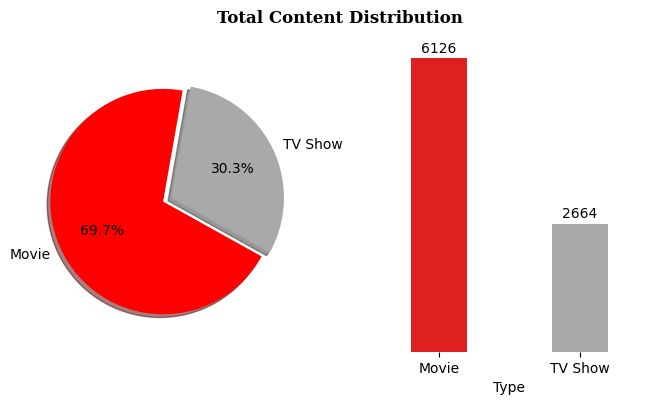

In [36]:
#plt.figure(figsize=(10,4))
fig, axes = plt.subplots(figsize=[8,4], facecolor = '#FFFFFF')

font = {'family': 'serif', 'weight': 'bold'}
col = ['red', 'darkgrey']
plt.style.use('default')
plt.title('Total Content Distribution', fontdict=font, size=12,pad = 15)
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,1, facecolor='white')
plt.pie(p_type.show_id,
    labels=p_type.type,
    startangle=80, explode=(0.08, 0), colors=col,
    shadow=True, autopct='%1.1f%%', textprops={'color': "k"})

plt.subplot(1,2,2, facecolor='white')
x = sns.barplot(y = p_type.show_id, x = p_type.type, data = p_type, palette= col , width=0.4)
for container in x.containers:
    x.bar_label(container, label_type='edge', padding=2)
sns.despine(left=True, bottom=True)
plt.yticks([])
plt.ylabel('')
plt.xlabel('Type')
axes.set_xticks([])  
axes.set_yticks([])  

plt.show()


#### Insight :
- **Pie Chart**:  
    - The pie chart illustrates the percentage distribution of Netflix content by type.  
    - Movies dominate the platform, accounting for approximately **69.3%** of the total content.  
    - TV Shows make up the remaining **30.7%**, indicating that Netflix primarily focuses on movies.  

- **Bar Chart**:  
    - The bar chart visually reinforces the numerical distribution of content types.  
    - The count of Movies is significantly higher than that of TV Shows, as depicted by the taller **red bar** compared to the shorter **dark grey bar**.

#### Total Content Released in Years 

In [37]:
ry_c = nx.release_year.value_counts().sort_index(ascending=False).head(20)
ry_c

release_year
2021    1425
2020    2257
2019    2436
2018    2725
2017    2334
2016    2085
2015    1420
2014     852
2013     696
2012     561
2011     421
2010     449
2009     407
2008     325
2007     206
2006     238
2005     178
2004     166
2003     139
2002     123
Name: count, dtype: int64

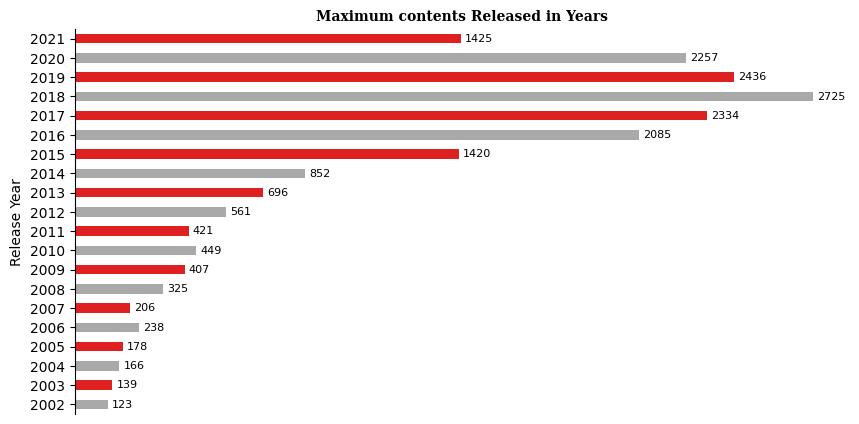

In [38]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-v0_8-bright')
y = sns.countplot(nx , y='release_year' , order = ry_c.index , palette=col , width=0.5)
for container in y.containers:
    y.bar_label(container, label_type='edge', padding=3, fontsize=8)
sns.despine(bottom=True)
plt.xticks([])
plt.xlabel('')
plt.ylabel('Release Year')
plt.title('Maximum contents Released in Years',fontsize=16,font = font)

plt.gca().set_facecolor('white')  # Set background to white
plt.show()

#### Insights:
- **Content Release Trends**:
	- **Content production peaked between 2016 and 2020**, with **2018** recording the highest number of releases **(2,725)**, followed by **2019 (2,436)** and **2020 (2,257)**.
	- A decline in content releases is noticeable in **2021**, likely due to the pandemic's aftereffects, as the number **dropped to 1,425**.
	- The trend shows a significant increase in content production post-2010, indicating the rapid growth of digital streaming platforms and demand for new content.

#### Top 20 countries consumption of movies and tvshows

In [39]:
#top movies
top_mc = md.groupby('country')[['show_id']].nunique().sort_values(by = 'show_id',ascending=False).head(20)
top_mc


,show_id
country,
United States,2395
India,976
United Kingdom,387
Not Given,257
Canada,187
France,148
Spain,129
Egypt,109
Nigeria,96


In [40]:
#top tv shows 
top_tv_c = tvsd.groupby('country')[['show_id']].nunique().sort_values(by = 'show_id',ascending=False).head(20)
top_tv_c

,show_id
country,
United States,845
Pakistan,350
United Kingdom,251
Japan,172
South Korea,165
Canada,84
India,81
Taiwan,71
France,65


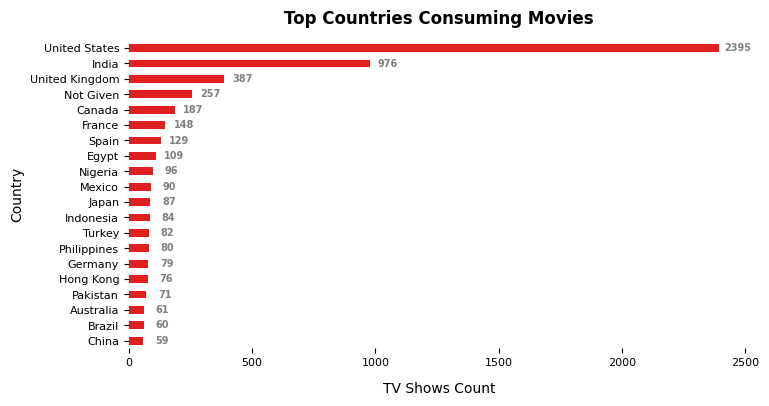

In [41]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-v0_8-bright')

# Subplot for TV Shows
sns.barplot(data=top_mc.reset_index(), x='show_id', y='country', color='red', width=0.5)
sns.despine(left=True, bottom=True)
plt.title('Top Countries Consuming Movies', fontsize=12, fontweight='bold', pad=12)
plt.xlabel('TV Shows Count', fontsize=10, labelpad=10)
plt.ylabel('Country', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.grid(axis='x', linestyle='-', alpha=0.6 , color = 'gray')
n=20
for i in range(n):
    plt.annotate(top_mc.show_id[i], (top_mc.show_id[i]+75,i+0.18),
                 ha='center' , color='gray', fontsize=7, fontweight='bold')

plt.gca().set_facecolor('white')  # Set background to white
plt.show()

#### Insights:
- **Movie Trend by Country**:
	- The **United States and India** dominate movie consumption, with the **U.S. leading significantly at 2,395 movies, followed by India at 976**.
	- The **United Kingdom** is the third-largest consumer, but with a much **lower count (387)** compared to the top two.
	- Other countries, including Canada, France, and Spain, have relatively smaller but noticeable consumption, while China shows the least engagement among the listed nations.


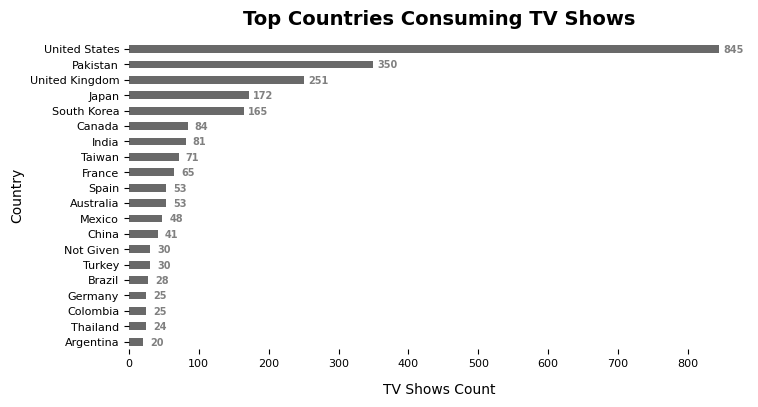

In [42]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-v0_8-bright')

# Subplot for TV Shows
sns.barplot(data=top_tv_c.reset_index(), x='show_id', y='country', color='dimgray', width=0.5)
sns.despine(left=True, bottom=True)
plt.title('Top Countries Consuming TV Shows', fontsize=14, fontweight='bold', pad=12)
plt.xlabel('TV Shows Count', fontsize=10, labelpad=10)
plt.ylabel('Country', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.grid(axis='x', linestyle='-', alpha=0.6 , color = 'gray')
n=20
for i in range(n):
    plt.annotate(top_tv_c.show_id[i], (top_tv_c.show_id[i]+20,i+0.23),
                 ha='center' , color='gray', fontsize=7, fontweight='bold')


plt.gca().set_facecolor('white')  # Set background to white
plt.show()

### Insights: 
- **TV Shows Trends by Country**:
    - The **U.S.** Leads in TV Show Consumption – With **845 TV shows**, the U.S. dominates Netflix's TV content audience, far surpassing other countries.
    - Pakistan’s Unexpected High Rank – Pakistan **(350)** ranks second, indicating a strong and growing demand for Netflix’s TV content in the region.
    - Rising Popularity in Asia & Europe – Countries like **South Korea, India, Japan,** and the UK show significant engagement, highlighting Netflix’s successful global expansion and localization efforts.


#### Contents added every year in netflix

In [43]:
yc_added = nx.groupby(['added_year','type'])[['show_id']].nunique().reset_index()
yc_added.sort_values(by='show_id',ascending=False, inplace=False)

,added_year,type,show_id
18,2019,Movie,1424
20,2020,Movie,1284
16,2018,Movie,1237
22,2021,Movie,993
14,2017,Movie,836
21,2020,TV Show,595
19,2019,TV Show,592
23,2021,TV Show,505
17,2018,TV Show,411
15,2017,TV Show,349


In [44]:
yc_added['show_id'].sum()

np.int64(8790)

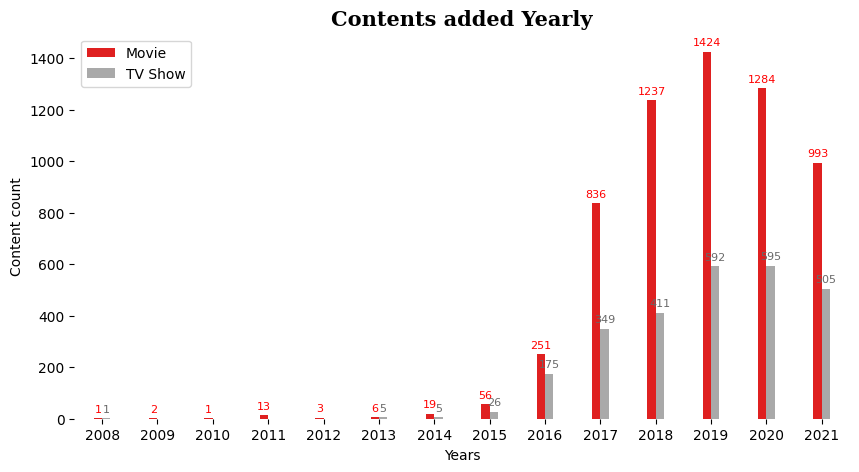

In [45]:
plt.figure(figsize=(10,5))
#plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

c = sns.barplot(data = yc_added, x = 'added_year' , y = 'show_id' ,
                hue = 'type', palette=['red','darkgrey'] , width=0.3) 
sns.despine(left=True, bottom=True) 
plt.title('Contents added Yearly',
          fontsize=15,fontweight="bold",fontfamily='serif')

c.bar_label(c.containers[0], label_type='edge',color='red' , fontsize=8 , padding=3)
c.bar_label(c.containers[1], label_type='edge',color='dimgray' , fontsize=8 , padding=3)

plt.legend(loc='upper left')
plt.ylabel('Content count',fontsize=10)
plt.xlabel('Years',fontsize=10)
plt.show()

#### Insights:
- **Content Adding Trends**:
    - **Significant Growth Since 2016** – Netflix’s content additions increased rapidly after **2016**, peaking in **2019** with **1,424 movies** and **392 TV shows**.
    - **Movies Outpace TV Shows** – Movies have consistently been added in higher numbers than TV shows, indicating a strong focus on expanding the movie library.
    - **Decline After 2019** – After the **2019** peak, content additions declined, possibly due to pandemic-related production slowdowns or a strategic shift.
    - **Sustained TV Show Growth** – While movie additions dropped, TV shows remained relatively stable, showing Netflix’s investment in serialized content.

#### Contents released every years 

In [46]:
mov_relese = md.groupby('release_year')[['title']].nunique()
mov_relese = mov_relese.reset_index()
mov_relese

,release_year,title
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,765
69,2018,766
70,2019,632
71,2020,517


In [47]:
tvs_relese = tvsd.groupby('release_year')[['title']].nunique()
tvs_relese = tvs_relese.reset_index()
tvs_relese

,release_year,title
0,1925,1
1,1945,1
2,1946,1
3,1963,1
4,1967,1
5,1972,1
6,1974,1
7,1977,1
8,1979,1
9,1981,1


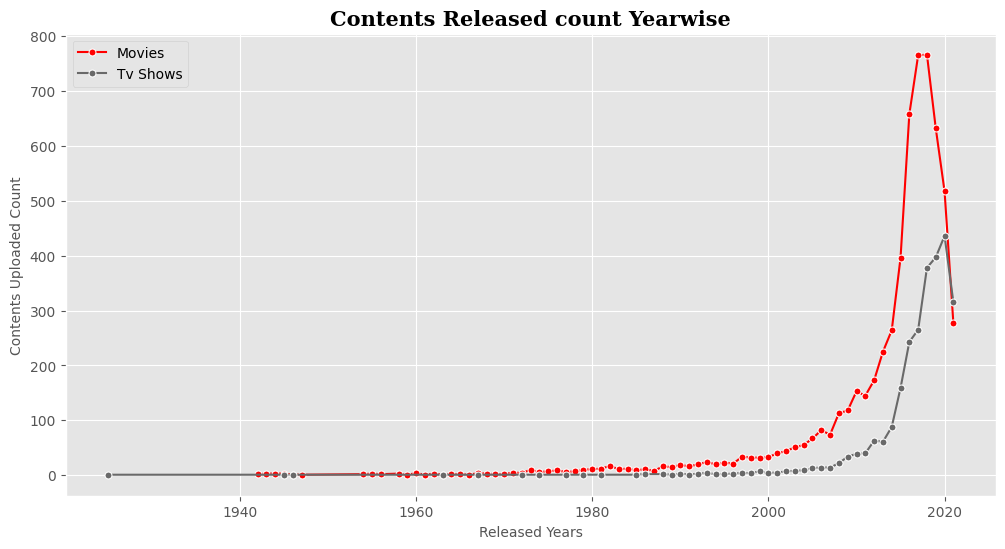

In [48]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.lineplot(data=mov_relese , x='release_year' , y='title' , color='r' ,
             label = 'Movies', marker='o', markersize=5)
sns.lineplot(data=tvs_relese , x='release_year' , y='title' , color='dimgrey',
             label='Tv Shows' , marker='o',  markersize=5)
plt.title('Contents Released count Yearwise',fontsize=15,
                      fontweight="bold",fontfamily='serif')
plt.ylabel('Contents Uploaded Count' , fontsize=10)
plt.xlabel('Released Years', fontsize=10)
plt.legend(loc='upper left')
plt.gca()
plt.show()

#### Insight:
- **Content Releasing Trends**:
    - **Exponential Growth in Content Releases** – Both movies and TV shows saw a **rapid increase in releases after 2000**, peaking around **2018-2020**.
    - **Movies Dominate Over TV Shows** – Movies have consistently been released in higher numbers compared to TV shows, reflecting a stronger focus on films.
    - **Sharp Decline After 2020** – There is a noticeable drop in content releases **post-2020**, likely due to **pandemic-related production** slowdowns and industry shifts.
    - **Minimal Releases Before 1980** – Content availability before 1980 is significantly lower, suggesting that Netflix’s library is more focused on modern content.



#### Total content(movies/tvshows) by genre  

In [49]:
m_genre = md.groupby('listed_in')[['title']].nunique().sort_values(by='title',ascending=False)
m_genre = m_genre.reset_index()
m_genre

,listed_in,title
0,International Movies,2752
1,Dramas,2424
2,Comedies,1673
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,755
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,576
9,Music & Musicals,375


In [50]:
tvs_genre = tvsd.groupby('listed_in')[['title']].nunique().sort_values(by='title',ascending=False)
tvs_genre = tvs_genre.reset_index()
tvs_genre

,listed_in,title
0,International TV Shows,1348
1,TV Dramas,761
2,TV Comedies,573
3,Crime TV Shows,469
4,Kids' TV,448
5,Docuseries,394
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,252
9,Anime Series,174


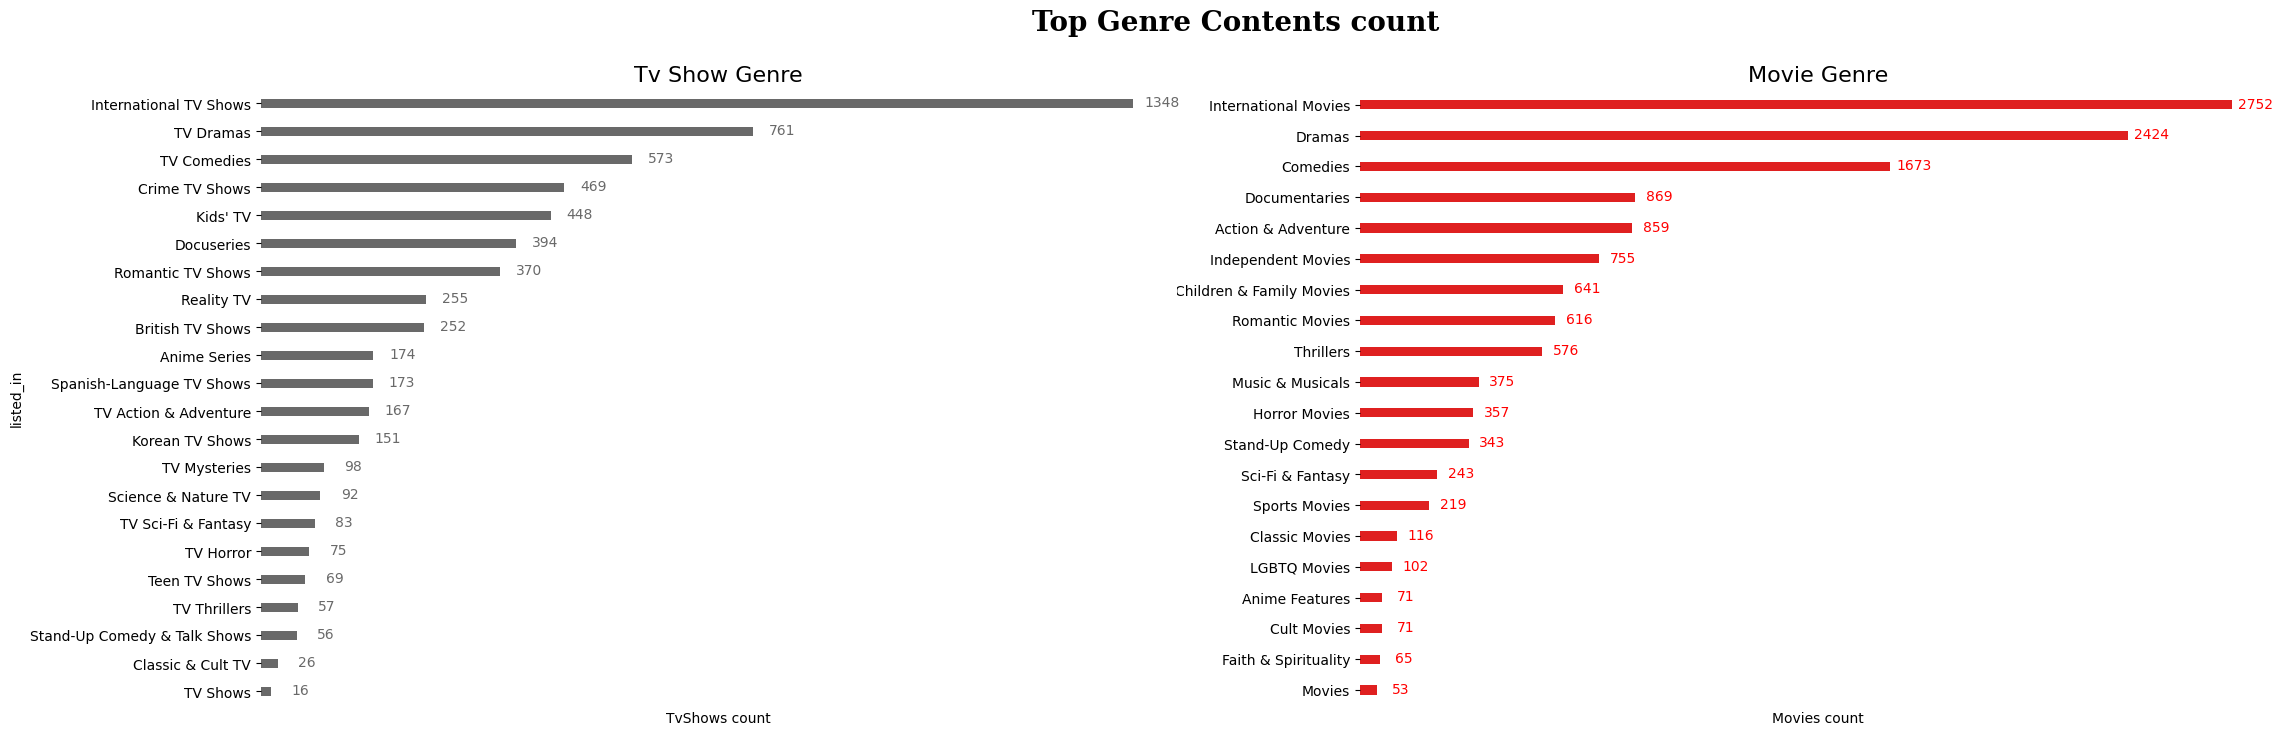

In [51]:

plt.figure(figsize=(26,8))
plt.suptitle('Top Genre Contents count',fontsize=20,
             fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,2)
sns.barplot(m_genre , x='title' , y='listed_in' , color='red' , width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.title('Movie Genre',fontsize=16)
plt.xlabel('Movies count')
plt.xticks([])
n=20
for i in range(n):
    plt.annotate(m_genre.title[i], (m_genre.title[i]+75,i+0.2),
                 ha='center' , va='bottom' , color='r')

plt.subplot(1,2,1)
sns.barplot(tvs_genre , x='title' , y='listed_in' , color='dimgrey' , width=0.3)
sns.despine(left=True,bottom=True,trim=True)
plt.title('Tv Show Genre',fontsize=16)
plt.xlabel('TvShows count')
plt.xticks([])
nn=22
for i in range(nn):
    plt.annotate(tvs_genre.title[i], (tvs_genre.title[i]+45,i+0.2),
                 ha='center' , va='bottom' , color='dimgrey')

plt.show()

#### Insights:
- **Top Genres Trends**:
    - **International Content Dominates** – Both TV shows and movies have a strong presence of international content, with **International TV Shows (1348)** and **International Movies (2752)** leading in their categories.
    - **Popular Genres Differ Slightly** – While **TV Dramas (761)** and **TV Comedies (573)** are highly popular in TV shows, **Dramas (2424)** and **Comedies (1673)** dominate movies.
    - **Documentaries & Action Thrive in Both** – **Documentaries and Action & Adventure** are among the top genres in both movies and TV shows, reflecting a high audience preference for these genres.


### Genre WordCloud

##### Movie word cloud

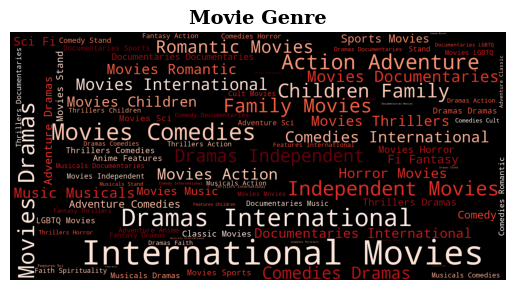

In [52]:

mg_wc = WordCloud(width=1600, height=800, background_color='black',
                 colormap='Reds').generate(md.listed_in.to_string())
plt.imshow(mg_wc)
plt.axis('off')
plt.title("Movie Genre",fontsize=14,fontweight='bold',fontfamily='serif')
plt.show()

##### TV Shows word cloud

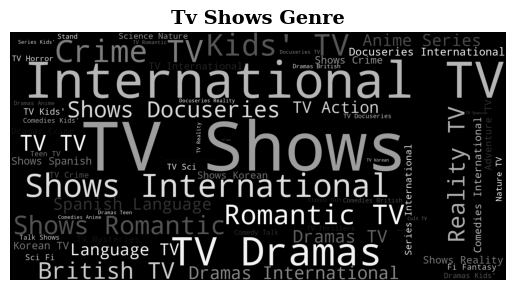

In [53]:
tvg_wc = WordCloud(width=1600, height=800, background_color='black',
                  colormap='Greys').generate(tvsd.listed_in.to_string())
plt.imshow(tvg_wc)
plt.axis('off')
plt.title("Tv Shows Genre",fontsize=14,fontweight='bold',fontfamily='serif')

plt.show()

#### contents distributed based on Runtime & Seasons

In [54]:
md['title'].nunique()

6124

In [55]:
tvsd['title'].nunique()

2663

In [56]:
# total movies as per runtime 
rt_m = md.groupby('runtime_in_mins')[['title']].nunique().sort_values(by='title',ascending=False)
rt_m = rt_m.reset_index()
rt_m

,runtime_in_mins,title
0,90,152
1,94,146
2,93,146
3,97,146
4,91,144
...,...,...
200,233,1
201,237,1
202,253,1
203,273,1


In [57]:
# total Tv Shows as per Seasons 
s_tvs = tvsd.groupby('seasons')[['title']].nunique().sort_values(by='title',ascending=False)
s_tvs = s_tvs.reset_index()
s_tvs

,seasons,title
0,1,1790
1,2,421
2,3,198
3,4,94
4,5,64
5,6,33
6,7,23
7,8,17
8,9,9
9,10,6


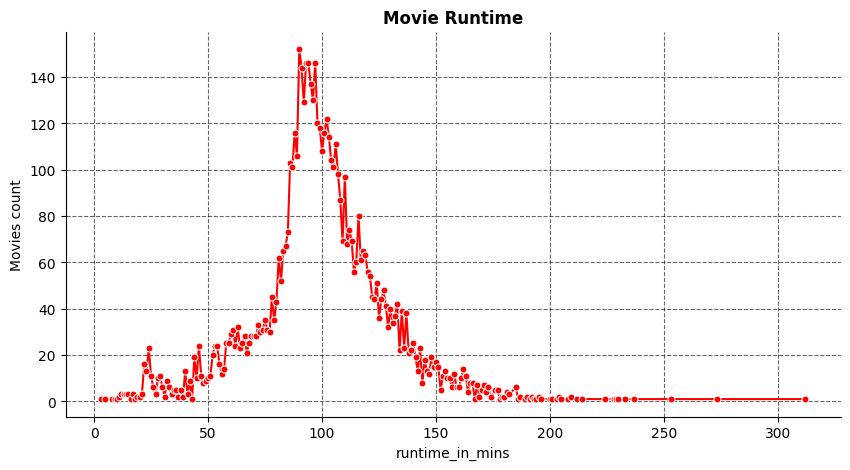

In [58]:
plt.figure(figsize=(10,5))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

sns.lineplot(rt_m , y='title' , x='runtime_in_mins' , color='red' , marker='o', markersize=5, )
sns.despine()
plt.grid(True, linestyle='--', alpha=0.6 , color='black')
plt.title('Movie Runtime' ,fontsize=12,fontweight="bold")
plt.ylabel('Movies count')
plt.bgcolor = 'white'

plt.show()






#### Insights:
- **Runtime Movies Trends**:
	- The most common movie runtime falls between **80 to 120 minutes**, with a peak around **90-100 minutes**, indicating the preferred duration for most films.
	- **Movies longer than 150 minutes are rare**, suggesting that filmmakers generally aim for concise storytelling to maintain audience engagement.

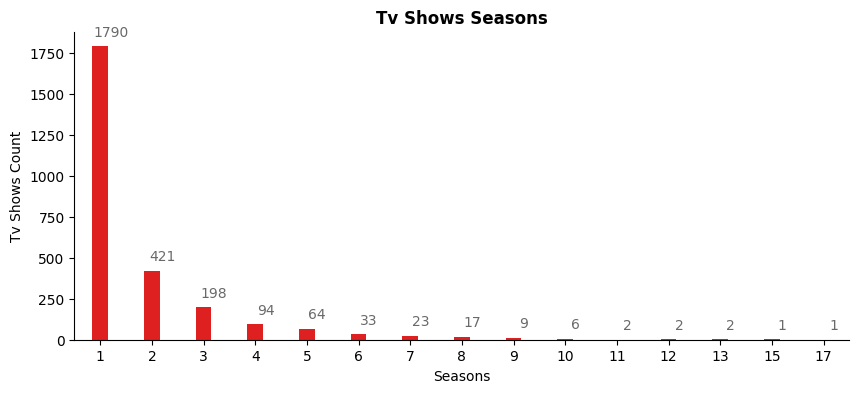

In [59]:
plt.style.use('default')
plt.figure(figsize=(10,4))
sns.barplot(s_tvs , y='title' , x='seasons' , color='red' , width=0.3)
sns.despine()
plt.title('Tv Shows Seasons',fontsize=12,fontweight="bold")
plt.ylabel('Tv Shows Count')
plt.xlabel('Seasons')
n=15
for i in range(n):
     plt.annotate(s_tvs.title[i], (i+0.2,s_tvs.title[i]+45),
                  ha='center' , va='bottom' , color='dimgrey')

plt.show()

#### Insights:
- **Runtime Tv Shows Trends**:
	- The majority of TV shows have only **one season (1790 shows)**, indicating a high rate of limited series or early cancellations.
	- **Multi-season shows are significantly fewer**, with a steep decline after the second season, suggesting that only a few series manage to sustain long-term viewer engagement.

#### Total content by Rating

In [60]:
md.rating.nunique()

14

In [61]:
tvsd.rating.nunique()

9

In [62]:
# total movies as per rating
rating_m = md.groupby('rating')[['title']].nunique().sort_values(by='title',ascending=False)
rating_m = rating_m.reset_index()
rating_m

,rating,title
0,TV-MA,2062
1,TV-14,1426
2,R,796
3,TV-PG,540
4,PG-13,490
5,PG,287
6,TV-Y7,139
7,TV-Y,131
8,TV-G,126
9,NR,75


In [63]:
# total Tv Shows as per rating
rating_tvs = tvsd.groupby('rating')[['title']].nunique().sort_values(by='title',ascending=False)
rating_tvs = rating_tvs.reset_index()
rating_tvs

,rating,title
0,TV-MA,1143
1,TV-14,729
2,TV-PG,321
3,TV-Y7,194
4,TV-Y,175
5,TV-G,94
6,NR,4
7,R,2
8,TV-Y7-FV,1


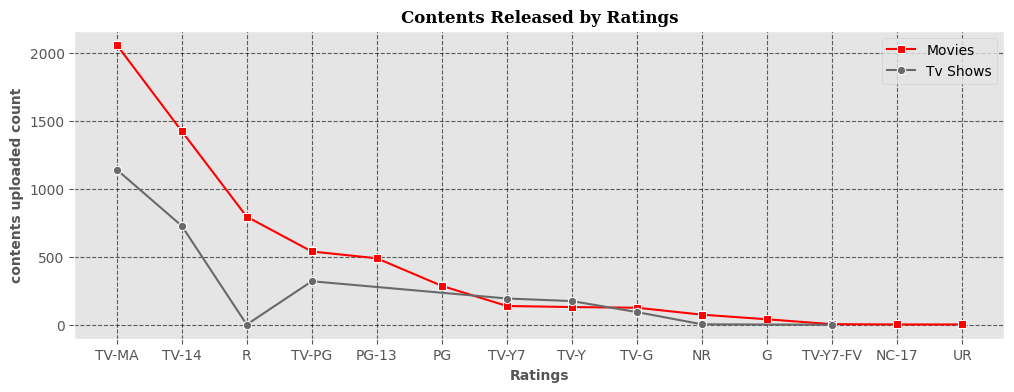

In [64]:
plt.figure(figsize=(12,4))
plt.style.use('ggplot')

sns.lineplot(data=rating_m , x='rating' , y='title' , color='r' , label = 'Movies', marker='s', markersize=6)
sns.lineplot(data=rating_tvs , x='rating' , y='title' , color='dimgrey', label='Tv Shows' , marker='o',  markersize=6)

plt.grid(True, linestyle='--', alpha=0.6 , color='black')
plt.title('Contents Released by Ratings',fontsize=12,fontweight="bold",fontfamily='serif')
plt.ylabel('contents uploaded count',fontsize=10, fontweight='bold')
plt.xlabel('Ratings',fontsize=10, fontweight='bold')
plt.legend(loc='upper right')

plt.show()

#### Insights:
- **Runtime Tv Shows Trends**:
	- **TV-MA (Mature Audiences) content dominates both movies(2062) and TV shows(1145)**, indicating a strong preference for mature-themed content.
	- **TV-14(733) and TV-PG(323) rated content follow**, showing a notable presence of moderately restricted content, especially in TV shows.
	- **Lower-rated content (TV-Y, G, PG) has significantly fewer releases**, suggesting a smaller market focus on family-friendly programming.

### Conclusion 
- The Netflix data analysis provides valuable insights into the platform’s content strategy, trends, and audience preferences. The key takeaways from the analysis include:

- Dominance of Movies: Netflix's content library is heavily skewed toward movies (69.3%), with TV shows making up the remaining 30.7%. This indicates a strong focus on films rather than serialized content.

- Peak Content Production (2016-2020): The highest number of releases occurred between 2016 and 2020, with a peak in 2018. However, content additions have declined post-2020, possibly due to industry shifts and pandemic-related slowdowns.

- Regional Popularity: The U.S. and India are the largest markets for both movies and TV shows. The strong presence of South Korea, Japan, and the UK suggests that Netflix has successfully expanded its global reach.

- Shift Towards TV Shows: While movies have historically dominated, Netflix has shown sustained investment in TV shows, particularly international content, indicating a move toward serialized storytelling.

- Genre Preferences: International content, dramas, and comedies are the most popular genres across both movies and TV shows. Documentaries and action content also perform well.

- Preferred Movie Runtime: Most movies range between 80-120 minutes, with a peak around 90-100 minutes, suggesting a focus on concise storytelling.

- Limited Seasons for TV Shows: The majority of TV shows have only one season, indicating a preference for limited series or a high rate of early cancellations.

- Content Rating: TV-MA-rated content dominates both movies and TV shows, showing a strong preference for mature-themed content.